# Linear Neural Networks for Regression
Basics of neural network training: parametizing output layer, handling data, specifying a loss func, training the model.  
## 3.1 Linear Regression
**Regression** problems pop up whenever we want to predict a numerical value.  
### 3.1.1. Basics
**Linear regression** is both the simplest and most popular among the standard tools for tackling regression problems.  
Assumptions: 
1. relationship between features x and target y is approximately linear.
2. the target value may deviate from its expected value on account of observation noise. Such noise is well behaved, following a Gaussian distribution.  

$n$: #examples in dataset. $\mathbf x^{(i)}$: $i^{th}$ sample. $x^{(i)}_j$: $j^{th}$ coordinate.  
#### 3.1.1.1 Model
**weights**: $\mathbf{w}$  
**bias(offset/intercept)**: $b$  
$\hat{y} = \mathbf{w}^{\top}\mathbf{x} + b$, x:len=d, w:len=d  
$\hat{\mathbf{y}} = \mathbf{X}\mathbf{w} + b$ X:size=n*d
#### 3.1.1.2. Loss Function
Squared error: $\ell^{(i)}(\mathbf{w}, b)=\frac{1}{2}Z\left(\hat{y}^{(i)} - y^{(i)}\right)^2$  
Measure the quality use avg loss on training set: 
$$
L(\mathbf{w}, b)
=
\frac{1}{n} \sum_{i=1}^{n} \ell^{(i)}(\mathbf{w}, b)
=
\frac{1}{n} \sum_{i=1}^{n}
\frac{1}{2}
\left(
\mathbf{w}^{\top} \mathbf{x}^{(i)} + b - y^{(i)}
\right)^2
$$
Seek parameters (w, b) to min total loss:
$$
\mathbf{w}^*, b^*
=
\arg\min_{\mathbf{w},\, b}
L(\mathbf{w}, b)
$$
#### 3.1.1.3. Analytic Solution
Taking the derivative of the loss with respect to w and setting it equal to 0:
$$
\partial_{\mathbf{w}} \, \|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2
=
2 \mathbf{X}^{\top} (\mathbf{X}\mathbf{w} - \mathbf{y})
=
0
\quad \Rightarrow \quad
\mathbf{X}^{\top} \mathbf{y}
=
\mathbf{X}^{\top} \mathbf{X} \mathbf{w}
$$
Solution:
$$
\mathbf{w}^*
=
(\mathbf{X}^{\top} \mathbf{X})^{-1}
\mathbf{X}^{\top} \mathbf{y}
$$
#### 3.1.1.4. Minibatch Stochastic Gradient Descent
- **Gradient descent**: iteratively reducing the error by updating the parameters in the direction that incrementally lowers the loss function.  
  --> really slow, every update need entire dataset.  
- **Stochastic gradient descent (SGD)**: consider only a single example at a time and to take update steps based on one observation at a time.   
  --> computational and statistical drawbacks. Matrix–vector multiplication is more efficient to perform than a corresponding number of vector–vector operations. Batch normalization only work well when we have access to more than one observation at a time.  
- Take a **minibatch** of observations: **minibatch stochastic gradient descent**, choose a number in [32, 256] (or a multiple of a large power of 2)

In each iteration in minibatch SGD: 
1. randomly sample a minibatch $\mathcal{B}_t$ with #|$\mathcal{B}$| of training examples. 
2. compute gradient of avg loss on the minibatch, with respect to the model parameters.
3. multiply the gradient by small positive **learning rate** $\eta$, substract the result from curr parameter values.
$$
(\mathbf{w}, b)
\leftarrow
(\mathbf{w}, b)
-
\frac{\eta}{|\mathcal{B}|}
\sum_{i \in \mathcal{B}_t}
\partial_{(\mathbf{w}, b)} \, \ell^{(i)}(\mathbf{w}, b)
$$
They closed-form expansion:
$$
\mathbf{w}
\leftarrow
\mathbf{w}
-
\frac{\eta}{|\mathcal{B}|}
\sum_{i \in \mathcal{B}_t}
\partial_{\mathbf{w}} \, \ell^{(i)}(\mathbf{w}, b)
=
\mathbf{w}
-
\frac{\eta}{|\mathcal{B}|}
\sum_{i \in \mathcal{B}_t}
\mathbf{x}^{(i)}
\bigl(
\mathbf{w}^{\top} \mathbf{x}^{(i)} + b - y^{(i)}
\bigr)
$$

$$
b
\leftarrow
b
-
\frac{\eta}{|\mathcal{B}|}
\sum_{i \in \mathcal{B}_t}
\partial_{b} \, \ell^{(i)}(\mathbf{w}, b)
=
b
-
\frac{\eta}{|\mathcal{B}|}
\sum_{i \in \mathcal{B}_t}
\bigl(
\mathbf{w}^{\top} \mathbf{x}^{(i)} + b - y^{(i)}
\bigr)
$$

Steps of minibatch SGD:
1. init modeal parameters (randomly).
2. sample random minibatches, update parameters along negative grad direction.
3. repeat 2.

**Hyperparameters**: minibatch size, learing rate are user-defined and not updated in the training loop.  
#### 3.1.1.5. Predictions
Make predictions for a new example using the model.
### 3.1.2. Vectorization for Speed
Vectorize the calculations and leverage fast linear algebra libraries to process whole minibatches of examples simultaneously.

In [1]:
%matplotlib inline
import math
import random
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
# time test
n = 10000
a = torch.ones(n)
b = torch.ones(n)

# add one by one
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
print(f'{time.time() - t:.5f} sec')

# vectorized code
t = time.time()
d = a + b
print(f'{time.time() - t:.5f} sec')

0.07799 sec
0.00000 sec


### 3.1.3. The Normal Distribution and Squared Loss
Visualize the normal distributions

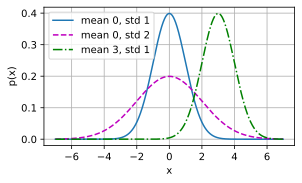

In [3]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

- change mean: shift along x-axis.
- increase variance: spread out, lower peak

Assume that observations arise from noisy measurements with noise $\varepsilon$,  $y = \mathbf{w}^{\top}\mathbf{x} + b + \varepsilon,\varepsilon \sim \mathcal{N}(0, \sigma^2)$  
**Likelihood** of seeing $y$ from given $\mathbf x$ is:
$$
P(y \mid \mathbf{x})
=
\frac{1}{\sqrt{2\pi\sigma^2}}
\exp\!\left(
-\frac{1}{2\sigma^2}
\left(y - \mathbf{w}^{\top}\mathbf{x} - b\right)^2
\right)
$$
According to the **principle of maximum likelihood**, the best values of parameters are those that maximize the likelihood of the entire dataset:
$$
P(\mathbf{y} \mid \mathbf{X})
=
\prod_{i=1}^{n}
p\!\left(y^{(i)} \mid \mathbf{x}^{(i)}\right)
$$
Estimators chosen according to the principle of maximum likelihood are called **maximum likelihood estimators**.  
Maximizing the product of exponential functions by maximizing the logarithm of the likelihood. We can **minimize** the **negative log-likelihood** as follows:
$$
-\log P(\mathbf{y} \mid \mathbf{X})
=
\sum_{i=1}^{n}
\frac{1}{2}\log(2\pi\sigma^2)
+
\frac{1}{2\sigma^2}
\left(
y^{(i)} - \mathbf{w}^{\top}\mathbf{x}^{(i)} - b
\right)^2
$$
Assume $\sigma$ is fixed, so can ignore the first term.  
Can also ignore the $\frac{1}{sigma^2}$. The rest is equivalent to minimizing mean squared error.
### 3.1.4. Linear Regression as a Neural Network
Linear regression is a single-layer neural network. Input: x1, x2...xd. d is the** number of inputs** or the **feature dimensionality** in the input layer. Have only one output neuron. All input values are given.
#### 3.1.4.1. Biology
biological neuron: consisting of dendrites (input terminals), the nucleus (CPU), the axon (output wire), and the axon terminals (output terminals), enabling connections to other neurons via synapses.



## 3.2 Object-Oriented Design for Implementation
3 classes:
- **Module** contains models, losses, and optimization methods.
- **DataModule** provides data loaders for training and validation.
- both classes are combined using the **Trainer** class, which allows us to train models on a variety of hardware platforms
### 3.2.1 Utilities
1. Register functions a methods in a class after the class has been created or even after have created instances of the class:

In [4]:
def add_to_class(Class): #@save
    """Register func as methods in created class"""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [5]:
# usage example
class A:
    def __init__(self):
        self.b = 1
a = A()

@add_to_class(A)
def do(self):
    print('b is:', self.b)

a.do()

b is: 1


2. Save all arguments in a class's __init__ as class attributes.

In [6]:
class HyperParameters:  #@save
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [7]:
# usage example
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))
b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


3. Plot progress interactively while it's going on.

In [8]:
class ProgressBoard(d2l.HyperParameters):  #@save
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

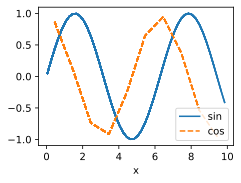

In [9]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### 3.2.2 Models
**Module** class need:
1. ```__init__```:  store the learnable parameters
2. ```training_step```: accept a data batch to return the loss
3. ```configure_optimizers```: return (a list of) the optimization methods for updating learnable parameters
4. (optional) ```validation_step```: report evaluation measures
5. (optional) ```forward```: compute output, make it reusable


In [10]:
class Module(nn.Module, d2l.HyperParameters):  #@save
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.3 Data
**DataModule**: base class for data.
1. ```__init__```: prepare data, include download/preprocess.
2. ```train_dataloader```: return data loader -- a generator that yields a data batch each time it's used.
3. ```training_step```: feed in batch data, compute loss
4. ```val_dataloader```: return validation dataset loader, yield data batches for ```validation_step``` in **Module**


In [11]:
class DataModule(d2l.HyperParameters):  #@save
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

### 3.2.4 Training
**Trainer**: train the learnable parameters in **Module** class with data specified in **DataModule**.  
Key method: ```fit```: accept arguments (model -- instance of **Module**, data -- instance of **DataModule**).   
Iterate over entire dataset ```max_epochs``` times to train the model.

In [12]:
class Trainer(d2l.HyperParameters):  #@save
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

### 3.2.5 Summary

## 3.3 Synthetic Regression Data
### 3.3.1. Generating the Dataset
Generate 1000 examples with 2-dimensional features drawn from a standard normal distribution by: appply **ground truth** linear func, add noise on it, drawn independently and identically.  
$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \boldsymbol{\epsilon}$, $\epsilon$ is drawn from mean = 0, SD $\sigma$ = 0.01

In [13]:
class SyntheticRegressionData(d2l.DataModule):  #@save
    """Synthetic data for linear regression."""
    def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000,
                 batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

In [14]:
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
print('features:', data.X[0],'\nlabel:', data.y[0])

features: tensor([-0.5217,  0.0348]) 
label: tensor([3.0393])


### 3.3.2 Reading the Dataset
Implement ```get_dataloader``` method into class via ```add_to_class```.  
- Input: batch size, matrix of feature, vector of label  
- Output: minibatches size=batch_size.  
- Need training mode: read in random order, validation mode:read in pre-defined order for debugging.

In [15]:
@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    if train:
        indices = list(range(0, self.num_train))
        # The examples are read in random order
        random.shuffle(indices)
    else:
        indices = list(range(self.num_train, self.num_train+self.num_val))
    for i in range(0, len(indices), self.batch_size):
        batch_indices = torch.tensor(indices[i: i+self.batch_size])
        yield self.X[batch_indices], self.y[batch_indices]

In [16]:
# first minibatch
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


### 3.3.3 Concise Implementation of the Data Loader
Call exist API in a framework to load data.

In [17]:
@d2l.add_to_class(d2l.DataModule)  #@save
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    # select a subset of each tensor
    tensors = tuple(a[indices] for a in tensors)

    # wrap tensors into a PyTorch dataset
    dataset = torch.utils.data.TensorDataset(*tensors)

    # return a DataLoader
    return torch.utils.data.DataLoader(dataset, self.batch_size,
                                       shuffle=train)

@d2l.add_to_class(SyntheticRegressionData)  #@save
def get_dataloader(self, train):
    # choose training/test indices
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

In [18]:
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

# can use build-in methods like:
print('train data length:', len(data.train_dataloader()))

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])
train data length: 32


## 3.4. Linear Regression Implementation from Scratch
Implement linear regression:
1. model
2. loss function
3. minibatch stochastic gradient descent optimizer
4. training function, stitch all together
### 3.4.1 Defining the Model
Initialize weight: drawn from random numbers from a normal distribution, mean=0, sd sigma=0.01.  Add as a subclass of ```d2l.Module``` (defined in 3.2.2)


In [19]:
class LinearRegressionScratch(d2l.Module):  #@save
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)


In [20]:
# define the model
@d2l.add_to_class(LinearRegressionScratch) #@save
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### 3.4.2 Defining the Loss Function
Use squared loss function.

In [21]:
@d2l.add_to_class(LinearRegressionScratch)  #@save
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### 3.4.3 Defining the Optimization Algorithm
Use minibatch SGD: 
- random draw a minibatch
- estimate grad of the loss
- update parameters to reduce the loss  

Apply update on given parameters, learning rate ```lr```.
No need to adjust learning rate for batch size here.

In [22]:
class SGD(d2l.HyperParameters):  #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [23]:
# instance for the SGD class
@d2l.add_to_class(LinearRegressionScratch)  #@save
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### 3.4.4 Training
Implement training loop: 
- in each **epoch**: iterate through entire training set, pass every example once.
- in each **iteration**: compute loss in a minibatch of examples through ```training_step``` method. Compute gradients for each parameter.
- call optimization algo to update parameters.
Execute following loop:
- Initialize parameters $(\mathbf{w}, b)$
- Repeat until down
  - Compute gradient $\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
  - Update parameters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$
  
For validation: 
Pass the validation dataloader once in each epoch to measure performance.

In [24]:
@d2l.add_to_class(d2l.Trainer)  #@save
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)  #@save
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        # compute loss for batch data
        loss = self.model.training_step(self.prepare_batch(batch))

        # clear old grad
        self.optim.zero_grad()

        with torch.no_grad():
            # compute new grad
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1

    # validation part
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

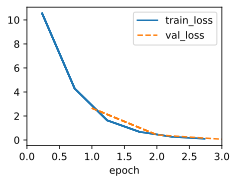

In [25]:
# train model with learning rate = 0.03, max epochs = 3
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [26]:
# evaluate result
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1739, -0.1868])
error in estimating b: tensor([0.2548])


### 3.4.5 Summary
Design deep learning systems by implementing a fully functional neural network model and training loop.  
- tensor for data storage and linear algebra
- auto differentiation for grad calc  

Next: more **concisely** (avoiding boilerplate code) and more **efficiently** (using our GPUs to their full potential).

## 3.5 Concise Implementation of Linear Regression
### 3.5.1 Defining the Model
Use a framework's predefined layers: **fully connected layer**, each input is connected to each output by matrix-vector multiplication.  
In pytorch: ```Linear```, ```LazyLinear``` class

In [27]:
# fully connected layer in pytorch: in Linear and LazyLinear class
class LinearRegression(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()

        # create a fully connected linear layer y=XW + b
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

# call forward method
@d2l.add_to_class(LinearRegression)  #@save
def forward(self, X):
    return self.net(X)

### 3.5.2 Defining the Loss Function
In Pytorch: ```MSELoss``` class

In [28]:
# MSELoss class for mean squared error without 1/2 factor.
@d2l.add_to_class(LinearRegression)  #@save
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

### 3.5.3 Defining the Optimization Algorithm
In Pytorch: ```optim``` module for minibatch SGD

In [29]:
# input: params requires_grad=true, lr step size
@d2l.add_to_class(LinearRegression)  #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

### 3.5.4 Training
Use ```fit``` method in 3.2.4, relied on ```fit_epoch``` in 3.4

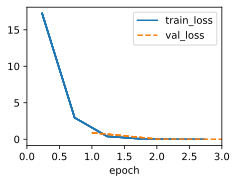

In [30]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [31]:
@d2l.add_to_class(LinearRegression)  #@save
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0066, -0.0123])
error in estimating b: tensor([0.0128])


## 3.6 Generalization
**Overfit**: fitting closer to training data than to the underlying distribution.  
**Regularization**: methods for combatting overfitting.
### 3.6.1 Training Error and Generalization Error
**IID assumption**: training & testing data are drawn independently from dentical distributions.  
**Training error** $R_\textrm{emp}$: calculated on training dataset. $R_\textrm{emp}[\mathbf{X}, \mathbf{y}, f] = \frac{1}{n} \sum_{i=1}^n l(\mathbf{x}^{(i)}, y^{(i)}, f(\mathbf{x}^{(i)})),$    
**Generalization error** $R$: expectation on underlying distribution. $R[p, f] = E_{(\mathbf{x}, y) \sim P} [l(\mathbf{x}, y, f(\mathbf{x}))] =
\int \int l(\mathbf{x}, y, f(\mathbf{x})) p(\mathbf{x}, y) \;d\mathbf{x} dy.$  
Estimate generalization error by applying model to test set.
#### 3.6.1.1 Model Complexity
Complex models may have: fit training data perfectly but generalization error not better than guessing.  
### 3.6.2 Underfitting or Overfitting
When comparing training & validation errors:
1. **Underfitting**: training & validation error are substantial but has little gap between. If cannot reduce training error --> model too simple. Remp-R **generalization gap** is small --> need more complex model.
2. **Overfitting**: training error is significantly lower than validation error.
#### 3.6.2.1 Polynomial Curve Fitting
Assume y can be approximated by a polynomial of degree d: $\hat{y}= \sum_{i=0}^d x^i w_i$, which is a linear regression problem: weights are wi, bias is w0. So can use squared error as loss.  
Fig for influence of polynomial degree (model complexity) on underfitting & overfitting.
#### 3.6.2.2 Dataset Size
Less samples in training set, more likely to overfit.  
More training data can degrease generalization error.
### 3.6.3 Model Selection
**Test set** is used to evaluate model final performance. **Validation set** is used to avoid overfitting on test set. **Overfitting the test set** is a risk. To avoid, split data into training, validation, and test set.
#### 3.6.3.1 Cross-Validation
**K-fold cross-validation**: split training into kK non-overlapping subsets, training and validation K times, each time train on K-1 subsets and validate on a diff subset (not used for training in this round). Training & validation error is avg of the K experiments.
### 3.6.4 Summary
1. Use validation / K-fold cross-validation
2. complexity notion: # parameters and the range of values they are allowed to take
3. more data beter result


## 3.7 Weight Decay
First regularization technique: Limiting the model capacity by reducing the polynomial degree.  
**Monomial**: product of variables, degree of it is the sum of the powers. Ex: $x_1^2 x_2$ is monomial of degree 3. # terms blows up when degree is larger.
### 3.7.1 Norms and Weight Decay
**Weight decay** ($\ell_2$ regularization): restrict the values that parameters can take. Instead of minimizing training loss, minimize loss + norm of weight: $L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2.$  
Model is complex if parameters far from 0 --> measure complexity by distance (norm) from 0.  
- $\ell_2$-regularized: **ridge regression algorithm**. For models that distribute weight evenly. More robust to measure error in single variable.  
- $\ell_1$-regularized: **lasso regression**. For models that concentrate weights on small number of features, cleaning other weights to 0.  

Minibatch stochastic gradient descent updates for $\ell_2$-regularized regression: $$\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}$$

### 3.7.2 High-Dimensional Linear Regression
Generate data: $y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \textrm{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$  
Overfit scenario: d = 200, 20 training examples. #parameters >> data.

In [32]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

### 3.7.3 Implementation from Scratch

#### 3.7.3.1 Defining $\ell_2$ Norm Penalty
Penalty: sum(sqrt(all terms))

In [34]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

#### 3.7.3.2 Defining the Model
Change from ```d2l.LinearRegressionScratch``` in 3.4: add penalty term

In [35]:
class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) +
                self.lambd * l2_penalty(self.w))

In [36]:
# train on 20 examples and evaluate on 100 examples
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

#### 3.7.3.3 Training without Regularization
```lambd = 0```: overfit.

L2 norm of w: 0.010201554745435715


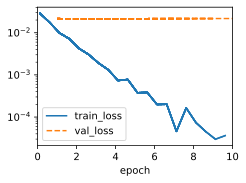

In [37]:
train_scratch(0)

#### 3.7.3.4 Usin Weight Decay
Training error increase, validation error decrease.


L2 norm of w: 0.0015805321745574474


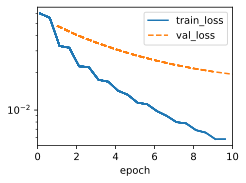

In [38]:
train_scratch(3)

### 3.7.4 Concise Implementation
Weight decay portion of the update depends only on the current value of each parameter, the optimizer must touch each parameter once anyway.  
Specify decay hyperparameters through ```weight_decay``` only for the weights ```net.weight```, the bias ```net.bias``` will not decay.


In [39]:
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

L2 norm of w: 0.015468742698431015


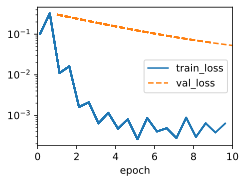

In [40]:
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))

For nonlinear models (NN), complexity measurement cannot be small weight = simple model.**reproducing kernel Hilbert space RKHS** theory can treat nonlinear as linear in high-dimensional space, but not useful in DL (too large and expensive, O(n^2)).   
Adapt weight decay on deep learning instead. 
### 3.7.5 Summary
- Regularization used for dealing overfitting.
- Add penalty term: $\ell_2$ penalty to loss when training to reduce complexity of model.